# Mall Customers

## Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

## Load and preprocess the dataset

In [12]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

# Print the first five rows of the dataset
print(data.head())

# Select the relevant features
X = data.iloc[:, [3, 4]].values

# Check the shape of the data
print(X.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(250, 2)


## Hierarchical clustering

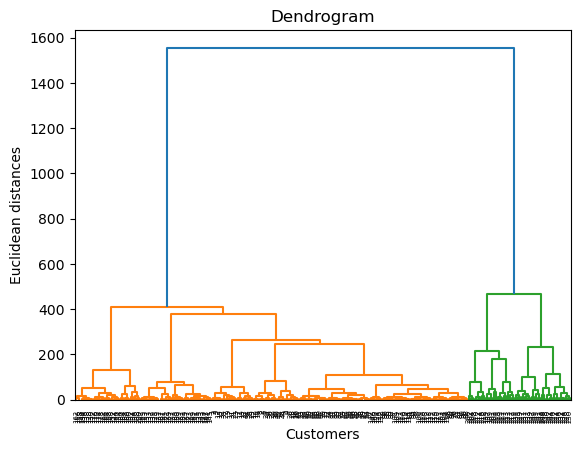

In [13]:
# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Set plot labels and title
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

# Display the plot
plt.show()

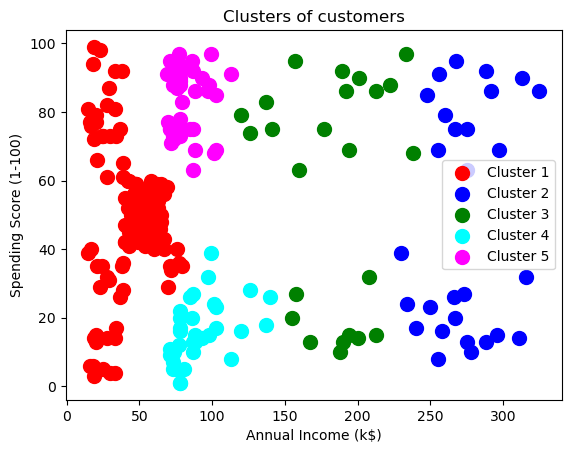

In [14]:
# Fit the Agglomerative Clustering model to the data
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Plot the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# Set plot labels and title
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Display the plot
plt.show()

## K-Means clustering

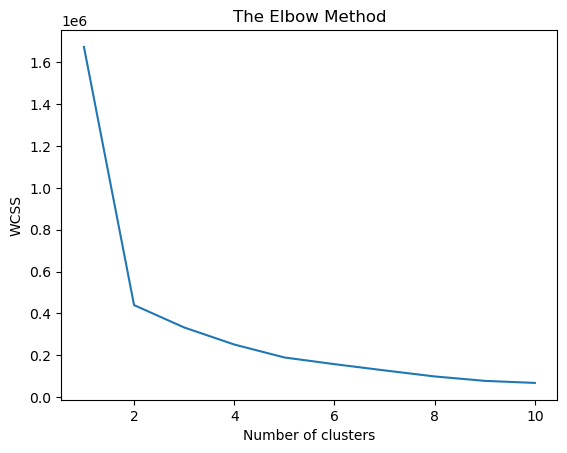

In [15]:
# Perform K-Means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Display the plot
plt.show()

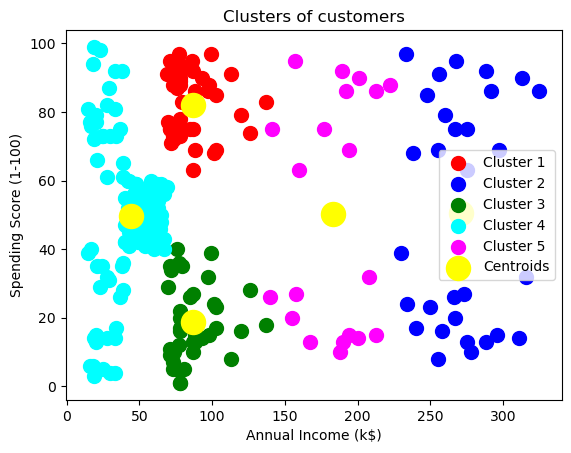

In [16]:
# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Shopping Customer

## Import libraries

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_moons, make_blobs
from sklearn.decomposition import PCA

## Load and preprocess the dataset

In [18]:
df = pd.read_csv('Shopping_CustomerData.csv')
le = LabelEncoder()
df['CustomerGender'] = le.fit_transform(df['CustomerGender'])
scaler = StandardScaler()
df[['CustomerAge', 'AnnualIncome', 'CreditScore', 'SpendingScore']] = scaler.fit_transform(df[['CustomerAge', 'AnnualIncome', 'CreditScore', 'SpendingScore']])
df = df.drop(['CustomerID', 'CustomerCity', 'CustomerCityID'], axis=1)

## K-Means clustering

In [19]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)
df['ClusterLabels'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[ 0.43548387 -0.03335534 -0.35944071  0.8548043  -0.76826673]
 [ 0.33846154 -0.05436646  0.29610175  0.30006695  1.11699148]
 [ 0.53424658  0.07673769  0.04162616 -0.99318108 -0.34208094]]


## Hierarchical clustering

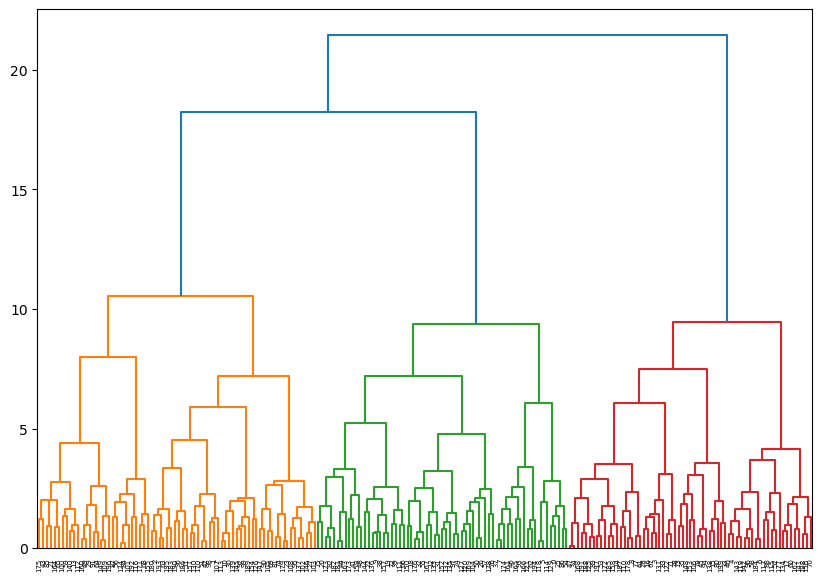

In [20]:
linked = linkage(df, method='ward')
distance_threshold = 15
df['HierarchicalLabels'] = fcluster(linked, distance_threshold, criterion='distance')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

## Moon & Blob

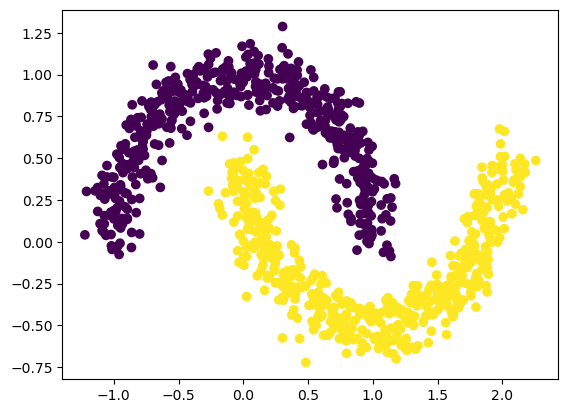

In [23]:
# Generate the Moon dataset
X_moon, y_moon = make_moons(n_samples=1000, noise=0.1)

# Plot the Moon dataset
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='viridis')
plt.show()

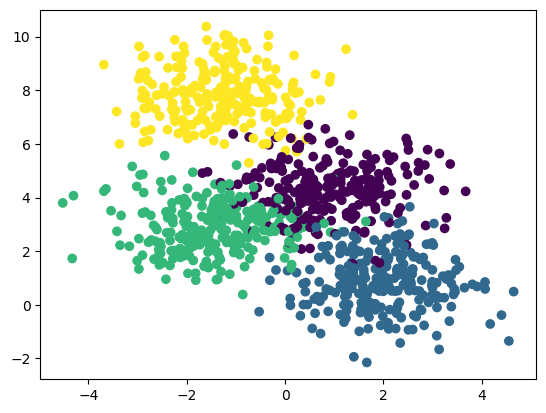

In [24]:
# Generate the Blob dataset
X_blob, y_blob = make_blobs(n_samples=1000, centers=4, random_state=0)

# Plot the Blob dataset
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='viridis')
plt.show()

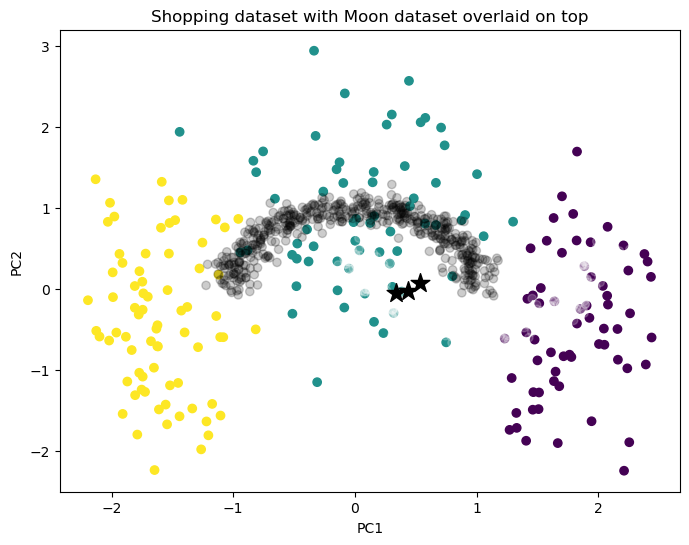

In [25]:
# Visualize K-Means clustering on shopping dataset
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='gray', alpha=0.2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Shopping dataset with Moon dataset overlaid on top')
plt.show()